# Amazon Chronos-T5 Model for Stock Price Prediction

This notebook demonstrates the use of Amazon's Chronos-T5-small model for forecasting TSLA stock prices.

**Model**: [amazon/chronos-t5-small](https://huggingface.co/amazon/chronos-t5-small)

**Features**:
- Time series forecasting with confidence intervals
- Performance evaluation using MAE, MSE, and RMSE
- Results comparison with other models

In [ ]:
import sys, os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

=== Chronos Forecast Runner ===

🧪 Train: 2025-03-03 → 2025-07-18 (rows=96)
🧾 Test:  2025-07-21 → 2025-07-24 (rows=4)
Chronos forecasting failed: 


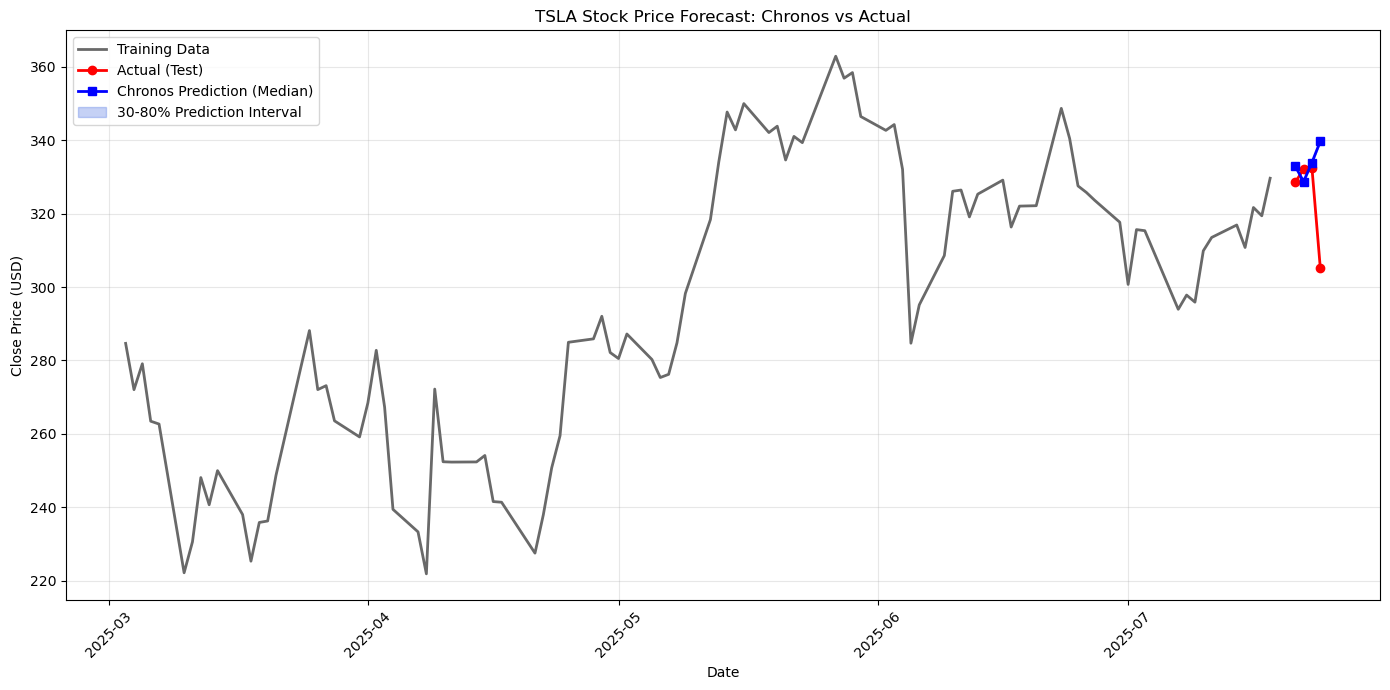

Forecast Performance Metrics:
MAE:  10.89
MSE:  303.91
RMSE: 17.43
Results saved to matrix successfully!
               MAE          MSE       RMSE
ARIMA    30.082745  1600.080000  40.001000
timesfm   4.624776    28.258014   5.315827
chronos  10.889489   303.912457  17.433085


In [ ]:
from models.chronos import main as chronos_main

# # Safe mode (dummy prediction, prohibit crash) 
# chronos_main(train_start='2025-03-01', context_len=96, test_days=5, use_model=False)

#실제 Chronos 모델 사용(자원 충분할 때만)
chronos_main(train_start='2025-03-01', context_len=96, test_days=5, use_model=True, device='cpu')